In [2]:
import numpy as np
from scipy.linalg import eigvals
import matplotlib.pyplot as plt

In [3]:
N = 1000
H = np.diag(np.linspace(-1, 1, N))
a = 0.1
EC = (1+a**2)/2
E0 = (1-a**2)/2
F = (H@H - EC*np.eye(N))/E0

G = H/1
a_r = a/1

In [4]:
def low_E_filter(ψ_rand, H, k):
    for i in range(k):
        if i == 0:
            ψ_n = ψ_rand
            continue
            
        if i == 1:
            ψ_nm1 = ψ_n
            ψ_n = H@ψ_nm1
            continue
            
        ψ_np1 = 2*H@ψ_n - ψ_nm1
        ψ_nm1 = ψ_n
        ψ_n = ψ_np1
        
    return ψ_n


def basis(ψ_proj, H, k):
    ψ_basis = np.zeros((k, len(ψ_rand)))
    for i in range(k):
        if i == 0:
            ψ_n = ψ_proj
            ψ_basis[i] = ψ_n
            continue
            
        if i == 1:
            ψ_nm1 = ψ_n
            ψ_n = H@ψ_nm1
            ψ_basis[i] = ψ_n
            continue
            
        ψ_np1 = 2*H@ψ_n - ψ_nm1
        ψ_nm1 = ψ_n
        ψ_n = ψ_np1
        ψ_basis[i] = ψ_n
        
    return ψ_basis

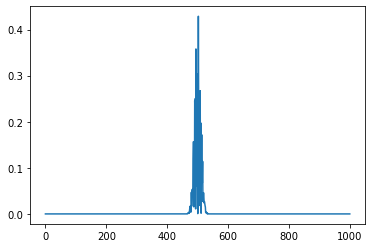

In [5]:
ψ_rand = np.random.rand(N)
ψ_rand = ψ_rand/np.linalg.norm(ψ_rand)

k = int(12/a)
ψ_proj = low_E_filter(ψ_rand, F, k)
ψ_proj = ψ_proj/np.linalg.norm(ψ_proj)

plt.plot(np.abs(ψ_proj))

In [6]:
d = 50
n = int((d*1.5 - 1)/2)
Kd = int(n*np.pi/a_r)

ψ_basis = basis(ψ_proj, G, Kd)


S = np.einsum(
    "ik,jk->ij", ψ_basis.conj(), ψ_basis
)

H_proj = np.einsum(
    "ik,kl,jl->ij", ψ_basis.conj(), H, ψ_basis, optimize=['einsum_path', (0, 1), (0, 1)]
)

eigv = eigvals(H_proj, S)

In [10]:
eigv

array([ 0.02126225+0.j,         inf+0.j,         inf+0.j, ...,
       -0.00094804+0.j, -0.00088006+0.j,  0.00140769+0.j])

/opt/conda/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


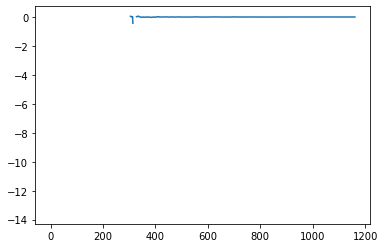

In [7]:
plt.plot(eigv)

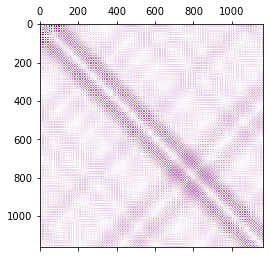

In [8]:
plt.matshow(H_proj, cmap='bwr')

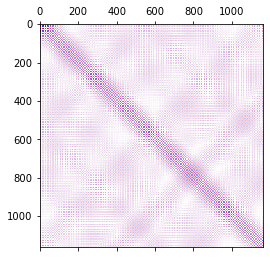

In [9]:
plt.matshow(S, cmap='bwr')